In [29]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_context('poster',font_scale=.8)
sns.set_style('whitegrid')
mpl.rc('figure',figsize=(15,2))

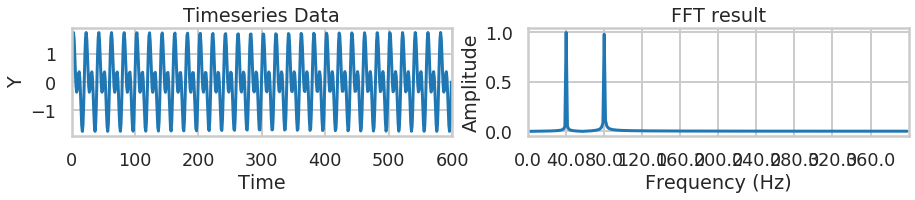

In [30]:
# Simulate Timeseries Data
N = 600 # number of smaples
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N) # generate x
y1 = np.sin(40.0 * 2.0*np.pi*x)+np.sin(80.0 * 2.0*np.pi*x) # generate data

f,ax=plt.subplots(1,2,figsize=(15,2))
# plot timeseries
ax[0].plot(y1)
ax[0].set(ylabel='Y',xlabel='Time',title='Timeseries Data',xlim=[0,N])
# Plot fft
ticksteps = 30
yf = fft(y1) # perform FFT
amp = 2.0/N * np.abs(yf)
ax[1].plot(amp[:N//2])
ax[1].set(xticks=(np.arange(0,N//2,ticksteps)), ylabel='Amplitude',xlabel='Frequency (Hz)',title='FFT result',xlim=[0,N//2])
ax[1].set_xticklabels(np.round(fftfreq(N,T)[:N//2],2)[::ticksteps],rotation=0)
plt.show()

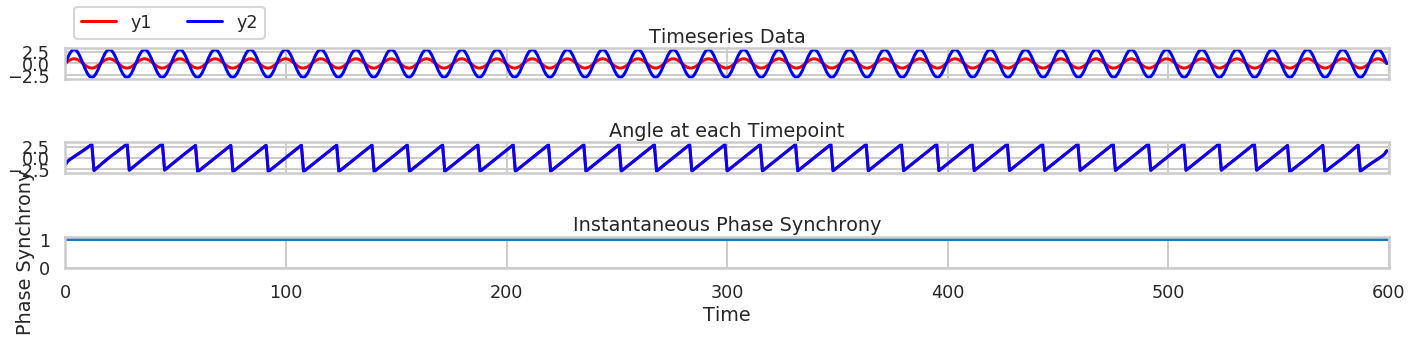

In [39]:
N = 600 # number of smaples
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N)
phase_y1, phase_y2 = 50., 50.
amp_y1, amp_y2 = 1.,3.
y1 = amp_y1*np.sin(phase_y1 * 2.0*np.pi*x)
y2 = amp_y2*np.sin(phase_y2 * 2.0*np.pi*x)
window=10
al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
f,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(title='Angle at each Timepoint')
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

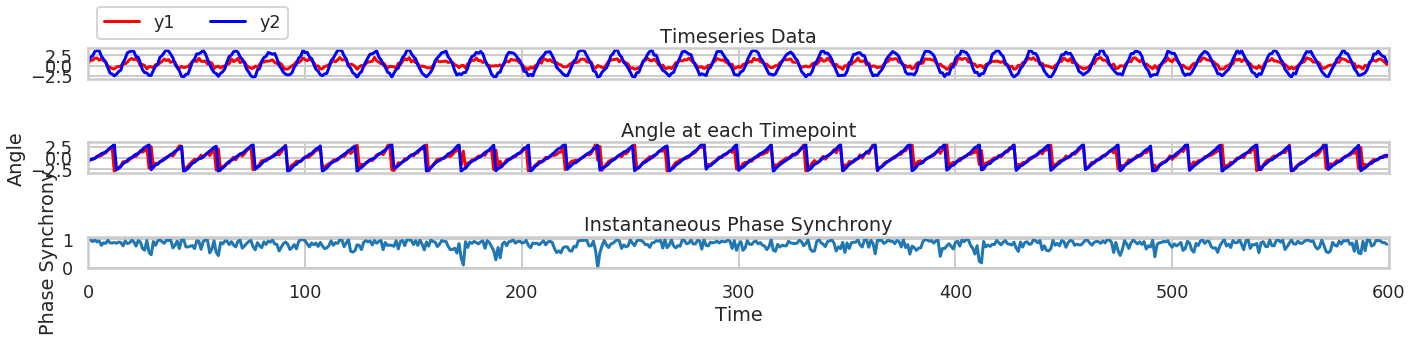

In [40]:
N = 600 # number of smaples
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N)
phase_y1, phase_y2 = 50., 50.
amp_y1, amp_y2 = 1.,3.
y1 = amp_y1*np.sin(phase_y1 * 2.0*np.pi*x)+np.random.rand(N)
y2 = amp_y2*np.sin(phase_y2 * 2.0*np.pi*x)+np.random.rand(N)
window=10
al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
f,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint')
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

In [55]:
tmp = pd.DataFrame(dict({'al1':al1, 'al2':al2}))

In [74]:
win_roll.fillna(0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.997613
         ...   
595    0.998628
596   -0.603524
597   -0.811721
598   -0.125520
599   -0.029584
Length: 600, dtype: float64

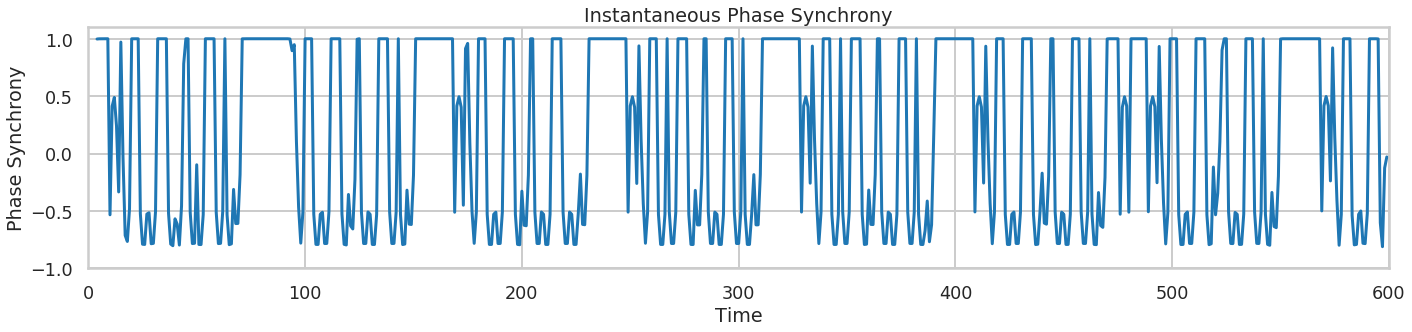

In [78]:
# win_roll = tmp['al1'].rolling(5).corr(tmp['al2'].rolling(5))
f,ax = plt.subplots(1,1,figsize=(20,5),sharex=True)
ax.plot(win_roll)
ax.set(ylim=[-1,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

Pandas computed Pearson r: -0.024564315371493364
Scipy computed Pearson r: -0.02456431537149315 and p-value: 0.5707611485825216


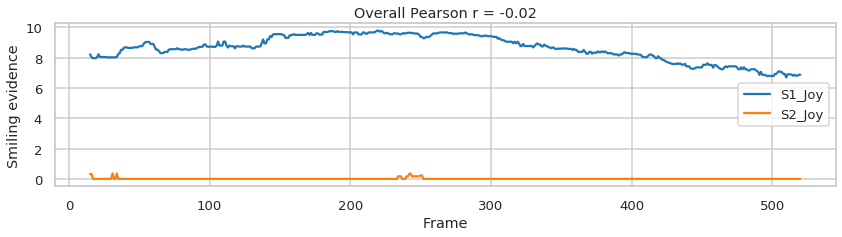

In [128]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('talk',font_scale=.8)

df = pd.read_csv('result/Gata2_Nfe2.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['S1_Joy'], df.dropna()['S2_Joy'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [90]:
df_interpolated.shape

(5400, 2)

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

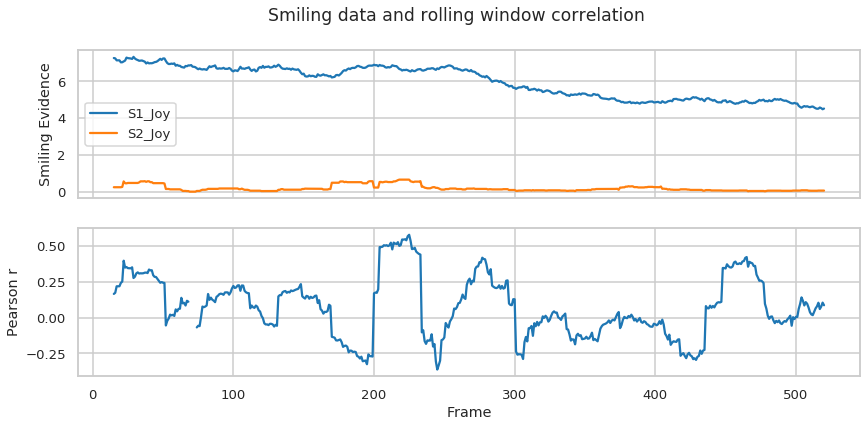

In [121]:
# Set window size to compute moving window synchrony.
r_window_size = 30
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['S1_Joy'].rolling(window=r_window_size, center=True).corr(df_interpolated['S2_Joy'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).mean().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

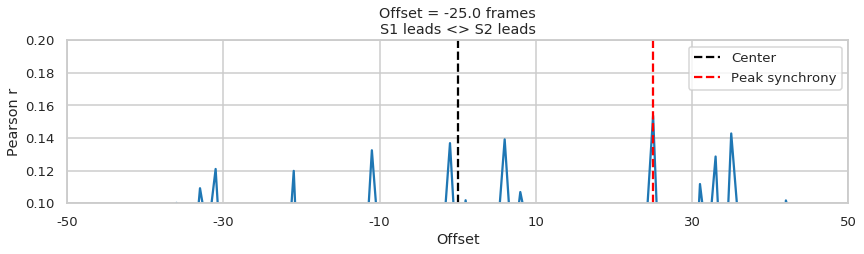

In [124]:

def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['S1_Joy']
d2 = df['S2_Joy']
seconds = 5
fps = 10
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.20],xlim=[0,100], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);
plt.legend()



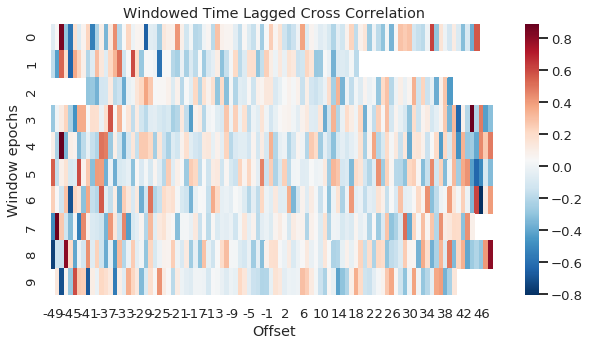

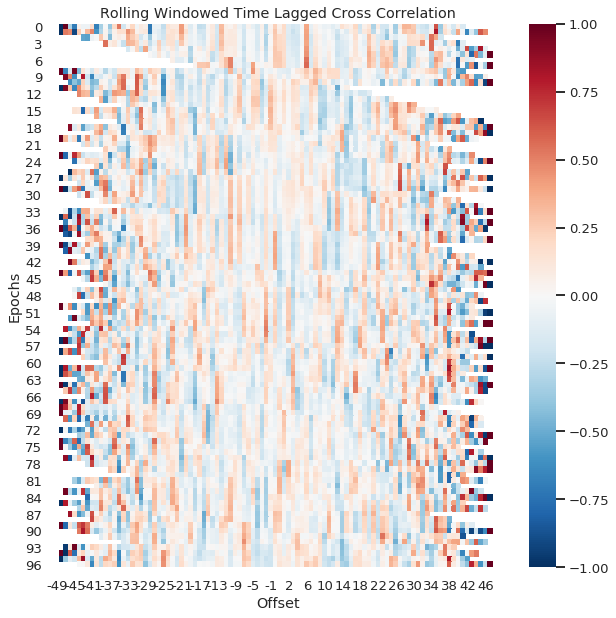

In [125]:
# Windowed time lagged cross correlation
seconds = 5
fps = 10
no_splits =10
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['S1_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,100], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 10
window_size = 50 #samples
t_start = 0
t_end = t_start + window_size
step_size = 5
rss=[]
while t_end < 535:
    d1 = df['S1_Joy'].iloc[t_start:t_end]
    d2 = df['S2_Joy'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,100], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);

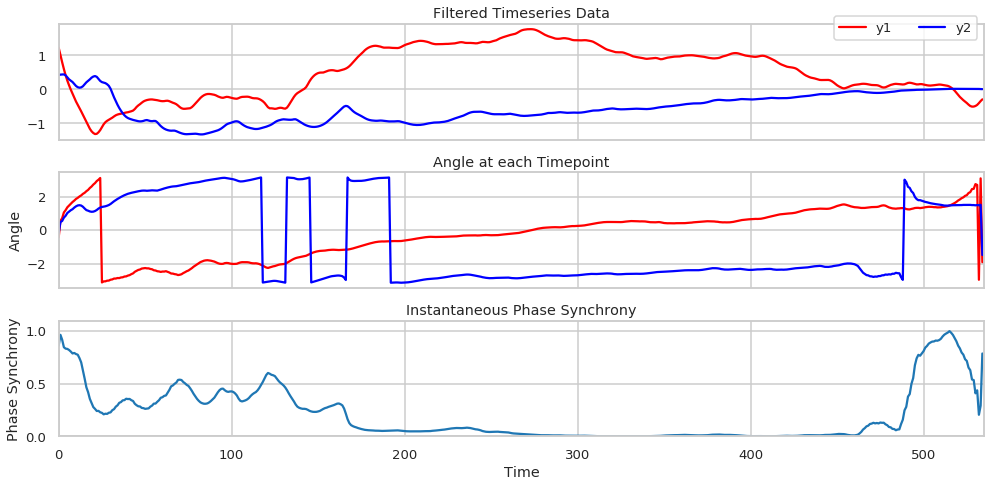

In [129]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['S1_Joy'].interpolate().values
d2 = df['S2_Joy'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()